In [1]:
import rasterio as rio
from rasterio.windows import from_bounds
from rasterio.plot import show
from pyproj import Transformer
import geopandas as gpd
import pandas as pd

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

In [3]:
# CRS	EPSG:31370 - Belge 1972 / Belgian Lambert 72 - Projected
# Extent	258000.0000000000000000,158000.0000000000000000 : 264000.0000000000000000,169000.0000000000000000
# Unit	meters
# Width	6000
# Height	11000



In [3]:
#tranform coordates X,Y
transformer = Transformer.from_crs(4326,31370)


In [18]:
#write the coordiantes to look for, this shoul come from the addres -> API?
x, y = transformer.transform(51.3159799, 4.4270626)

In [19]:
print(x,y)

154065.07027911095 222908.22549388092


In [6]:
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import seaborn as sns


In [20]:
#another way
import rioxarray as rxr


In [21]:
lidar_dmt_xr = rxr.open_rasterio('DTM/DHMVIIDTMRAS1m_k07.tif', masked=True).squeeze()

In [22]:
lidar_dsm_xr = rxr.open_rasterio('DSM/DHMVIIDSMRAS1m_k07.tif', masked=True).squeeze()

In [23]:
bounds=lidar_dmt_xr.rio.bounds()

In [24]:
bounds

(130000.0, 218000.0, 162000.0, 238000.0)

In [25]:
if bounds[0] <= x <= bounds[2] and bounds[1] <= y <= bounds[3]:
    print('ok')

ok


In [26]:
print("Is the spatial extent the same?",
      lidar_dmt_xr.rio.bounds() == lidar_dsm_xr.rio.bounds())

Is the spatial extent the same? True


In [27]:
print("Is the resolution the same?",
      lidar_dmt_xr.rio.resolution() == lidar_dsm_xr.rio.resolution())

Is the resolution the same? True


In [14]:
lidar_chm_xr = lidar_dsm_xr - lidar_dmt_xr

In [15]:
lidar_chm_xr.rio.to_raster('w3.tif')


In [32]:
x_left = x - 50
x_right = x + 25
y_up = y + 100
y_down = y - 25

In [34]:
with rio.open('w3.tif') as img:
    w3 = img.read(1, window=from_bounds(x_left, y_down, x_right, y_up, img.transform))

In [30]:
type(w3)

numpy.ndarray

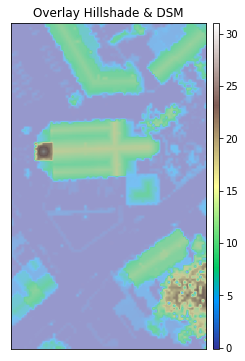

In [35]:
fig, ax = plt.subplots(figsize=(10, 6))
ep.plot_bands(
    w3,
    ax=ax,
    cmap="terrain",
    title="Overlay Hillshade & DSM",
)
ax.imshow(w3, cmap="Greys", alpha=0.5)
plt.show()

In [36]:
w_gdp3=gpd.GeoDataFrame(w3)

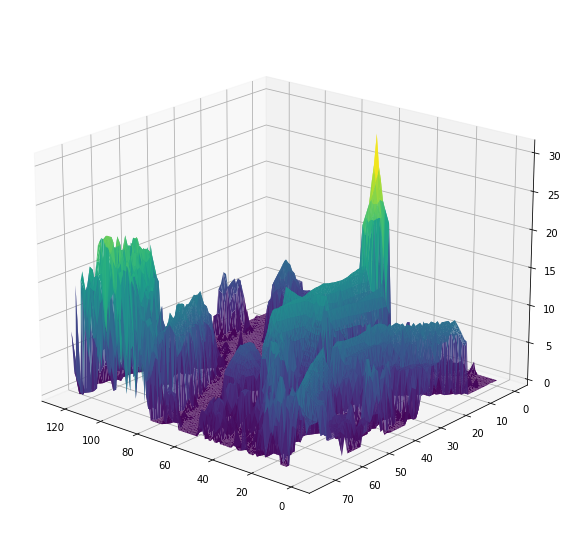

In [51]:
df=w_gdp3.unstack().reset_index()
df.columns=["X","Y","Z"]
df['X']=pd.Categorical(df['X'])
df['X']=df['X'].cat.codes
fig = plt.figure(figsize=(35,10))
ax = fig.gca(projection='3d')
ax.plot_trisurf(df['Y'], df['X'], df['Z'], cmap=plt.cm.viridis, linewidth=0.1)
ax.view_init(20, -230)
plt.show()